## Machine Learning Model must include:
- Training the model
- Validation of the model

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to build the models
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# for feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score

In [2]:
X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

,Defaulted,Amount,ApplicationSignedHour,ApplicationSignedWeekday,City,Country,DateOfBirth,DebtToIncome,Education,EmploymentDurationCurrentEmployer,EmploymentPosition,EmploymentStatus,ExistingLiabilities,Gender,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeTotal,Interest rate (APR),LoanDate,LoanDuration,MaritalStatus,NewCreditCustomer,NoOfPreviousLoansBeforeLoan,OccupationArea,UseOfLoan,VerificationType,WorkExperience,PreviousScore,City_na,EmploymentDurationCurrentEmployer_na,EmploymentPosition_na,WorkExperience_na,DebtToIncome_na,Education_na,EmploymentStatus_na,Gender_na,HomeOwnershipType_na,MaritalStatus_na,OccupationArea_na,VerificationType_na,PreviousScore_na
0,1,0.234263,0.695652,0.500000,0.5,0.000000,0.6750,0.145198,0.50,0.666667,0.142857,0.25,0.055556,0.5,0.111111,0.000000,0.012624,0.149441,0.636364,0.593220,0.50,1.0,0.0,0.45,0.054545,1.000000,0.4,0.281769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.238501,1.000000,0.000000,0.5,0.333333,0.4125,0.075163,0.75,0.333333,0.714286,0.25,0.027778,0.0,0.777778,0.014180,0.014180,0.109500,0.454545,1.000000,0.00,1.0,0.0,0.10,0.027273,0.666667,0.0,0.158786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.102402,0.652174,0.333333,0.5,0.000000,0.5750,0.344172,1.00,1.000000,0.857143,0.25,0.277778,0.5,0.333333,0.006466,0.008414,0.108263,0.636364,0.186441,0.25,1.0,0.0,0.85,0.000000,1.000000,0.8,0.434872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.799383,0.869565,0.333333,0.2,0.000000,0.7125,0.231616,0.75,0.500000,0.571429,0.25,0.027778,0.5,0.333333,0.013534,0.013534,0.118316,0.363636,1.000000,0.25,1.0,0.0,0.70,0.063636,0.000000,0.6,0.201637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.279943,0.695652,0.000000,0.5,0.000000,0.5000,0.394822,0.75,0.666667,0.714286,0.25,0.055556,0.5,0.111111,0.006015,0.006015,0.112555,0.000000,1.000000,0.00,1.0,0.0,0.10,0.018182,0.000000,0.6,0.340646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# capture the target
y_train = X_train['Defaulted']
y_test = X_test['Defaulted']

features = pd.read_csv('selected_features.csv', header=None)
features = [x for x in features[0]] 
features

['Amount',
 'City',
 'Country',
 'DateOfBirth',
 'DebtToIncome',
 'Education',
 'EmploymentPosition',
 'ExistingLiabilities',
 'Gender',
 'HomeOwnershipType',
 'IncomeFromPrincipalEmployer',
 'Interest rate (APR)',
 'LoanDuration',
 'NewCreditCustomer',
 'NoOfPreviousLoansBeforeLoan',
 'VerificationType',
 'PreviousScore']

In [4]:
# reduce the train and test set to the desired features
X_train = X_train[features]
X_test = X_test[features]

## Random Forest Model

In [20]:
from sklearn import metrics
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, f1_score
from sklearn.metrics import roc_curve

### Tuning the Model

from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=0)
rf_params = { 
    # Number of trees in random forest
    'n_estimators': np.arange(10,101, 10),
    # Number of features to consider at every split
    'max_features': ['auto', 'sqrt', 'log2'],
    # Maximum number of levels in tree
    'max_depth':np.arange(5,15,1),
    # Minimum number of samples required at each leaf node
    #'min_samples_leaf' = [1, 2, 4]
    # Method of selecting samples for training each tree
    #'bootstrap' = [True, False]
}

gs_random = GridSearchCV(estimator=rf, param_grid=rf_params, cv= 5)
gs_random.fit(X_train, y_train)
print(gs_random.best_params_)

In [6]:
rf = RandomForestClassifier(n_estimators=10, max_depth = 5, max_leaf_nodes = 45, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=45,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

For tree based ensemble method’s like random forest or gradient boosting the most important parameters are:
- max_depth, 
- min_sample_leaf
- n_estimators (number of trees in the ensemble)

### Validating the Model

**R Square**

In [7]:
# train
y_pred = rf.predict(X_train)
print('R-Square: ', metrics.accuracy_score(y_train, y_pred))

# test
y_pred = rf.predict(X_test)
print('R-Square: ',metrics.accuracy_score(y_test, y_pred))

R-Square:  0.7429364617382349
R-Square:  0.7519699140401146


**Cross-Validation**

In [21]:
scores = cross_val_score(rf, X_train, y_train, cv=5)
print('Score: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Score: 0.73 (+/- 0.02)


**Confusion Matrix**

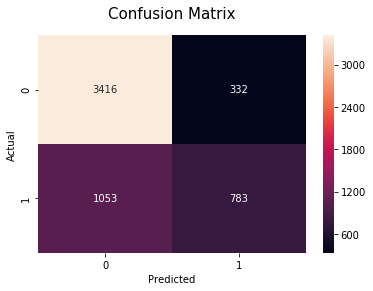

In [8]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt='2.0f')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix', y=1.05, size=15)
plt.show()

**F1-Score & Classification Report**

In [9]:
print(f1_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

0.5306675703151474

             precision    recall  f1-score   support

          0       0.76      0.91      0.83      3748
          1       0.70      0.43      0.53      1836

avg / total       0.74      0.75      0.73      5584



**Predicted Probability**

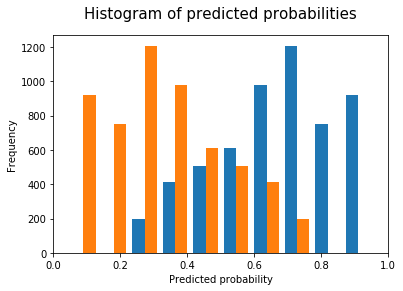

In [10]:
plt.figure(figsize=[6,4])
y_pred_proba = rf.predict_proba(X_test)
plt.hist(y_pred_proba, linewidth=1.2); plt.xlim(0, 1)
plt.xlabel('Predicted probability'); plt.ylabel('Frequency')
plt.title('Histogram of predicted probabilities', y=1.05, size=15)
plt.show()

**ROC_Curve**

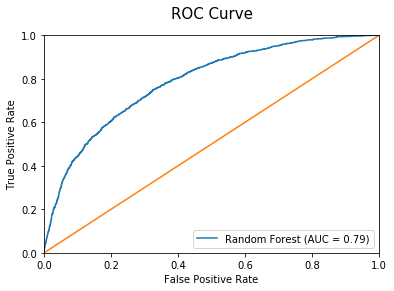

In [11]:
plt.figure(figsize=(6,4))

# get predictions and auc score
pred_proba = rf.predict_proba(X_test)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, pred_proba[:,1])
rf_roc_auc = roc_auc_score(y_test, pred_proba[:,1])

# Plot Decision Tree ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1])
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curve', y=1.05, size=15); plt.legend(loc="lower right")
plt.show()

### Interpreting the Model

**Feature Importance**

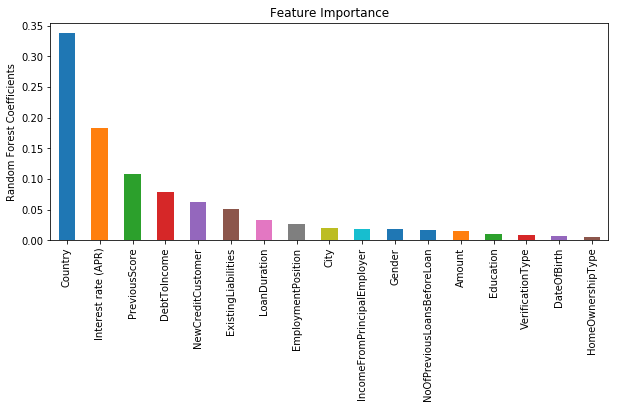

In [19]:
importance = pd.Series(rf.feature_importances_)
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(10,4))
plt.ylabel('Random Forest Coefficients')
plt.title('Feature Importance')
plt.show()

**Permutation Importance**

In [26]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, random_state=0).fit(X_test, y_test)
eli5.show_weights(rf, feature_names = X_test.columns.tolist())

Weight,Feature
0.3378 ± 0.3170,Country
0.1837 ± 0.2069,Interest rate (APR)
0.1082 ± 0.1144,PreviousScore
0.0786 ± 0.0833,DebtToIncome
0.0625 ± 0.1131,NewCreditCustomer
0.0517 ± 0.0976,ExistingLiabilities
0.0328 ± 0.0355,LoanDuration
0.0260 ± 0.0373,EmploymentPosition
0.0191 ± 0.0525,City
0.0185 ± 0.0239,IncomeFromPrincipalEmployer


**Partial Plot**

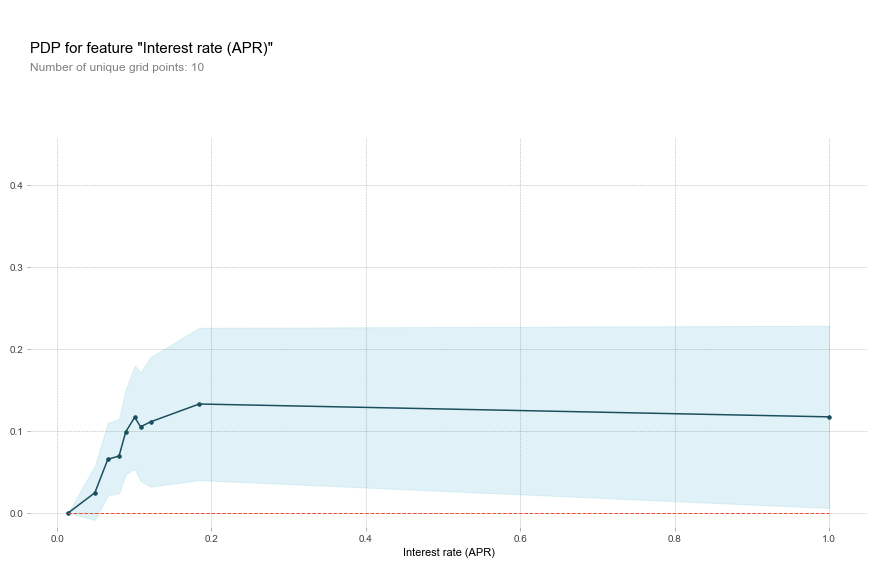

In [51]:
from pdpbox import pdp, get_dataset, info_plots

pdp_goals = pdp.pdp_isolate(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), 
                            feature='Interest rate (APR)')
pdp.pdp_plot(pdp_goals, 'Interest rate (APR)')
plt.show()

**2D - Partial Plot**

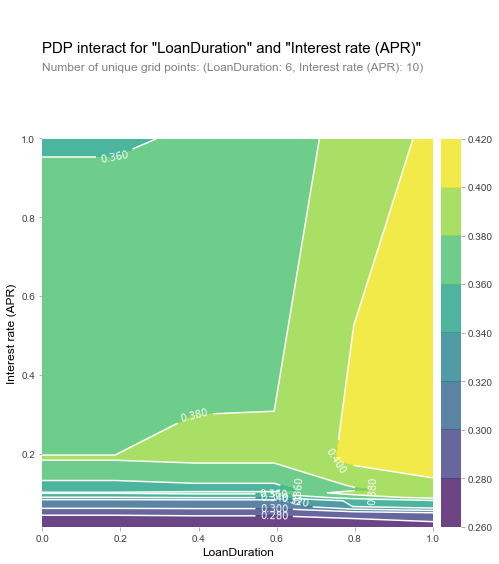

In [52]:
features_to_plot = ['LoanDuration', 'Interest rate (APR)']
inter1  =  pdp.pdp_interact(model=rf, dataset=X_test, model_features=X_test.columns.tolist(), features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

**Shape Values - Individual Predictions**

In [61]:
row_to_show = 3
data_for_prediction = X_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

rf.predict_proba(data_for_prediction_array)

array([[0.45558559, 0.54441441]])

In [72]:
import shap  # package used to calculate Shap values
# Create object that can calculate shap values
explainer = shap.KernelExplainer(model = rf, data = X_test )

Provided model function fails when applied to the provided data set.


TypeError: 'RandomForestClassifier' object is not callable